In [1]:
!nvidia-smi

Thu Nov 20 08:59:07 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   35C    P8              8W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

## DOWNLODING REQUIRED PACKAGES

In [2]:
!pip install  opencv-python matplotlib seaborn easyocr streamlit ultralytics  albumentations --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 77.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 112.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 56.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 106.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.7/180.7 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 963.8/963.8 kB 42.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.6/300.6 kB 27.4 MB/s eta 0:00:00


## CHECKING FOR DATASET PRESENCE IN THE DRIVE

In [3]:
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

DATASET_PATH = "/content/drive/MyDrive/Final_project/NumberPlate Datset with annotation/images"

if os.path.exists(DATASET_PATH):
    print(f"Dataset found at:, {DATASET_PATH}")
else:
    print("Dataset path not found. Please check the path.")


Dataset found at:, /content/drive/MyDrive/Final_project/NumberPlate Datset with annotation/images


#RANDOM IMAGES OF THE DATA SET

Total images found: 410


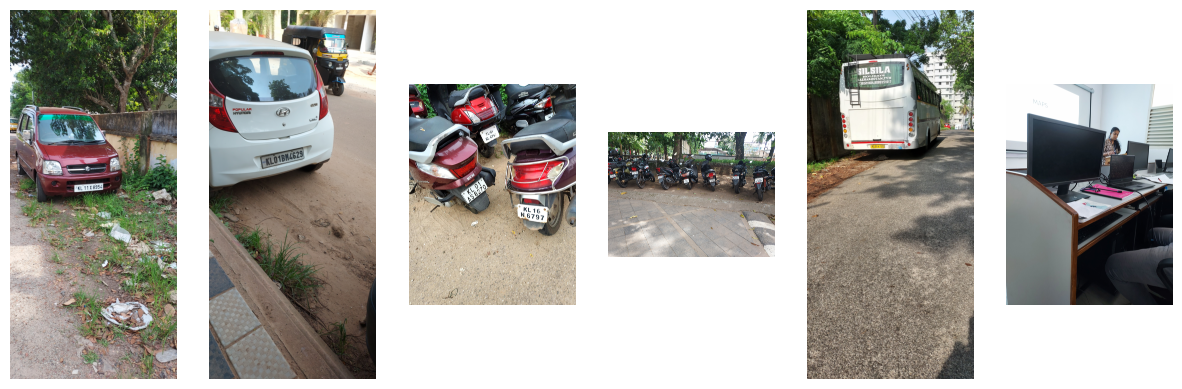

In [4]:
import glob
import random


image_files = glob.glob(os.path.join("/content/drive/MyDrive/Final_project/NumberPlate Datset with annotation/images/images", "*.jpg"))

print("Total images found:", len(image_files))

sample_images = random.sample(image_files, 6)

fig, axes = plt.subplots(1, 6, figsize=(15, 5))
for idx, img_path in enumerate(sample_images):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    axes[idx].imshow(img)
    axes[idx].axis("off")
plt.show()


CHECKING ALL THE IMAGES FOR LABELS

Found 115 images with matching labels.


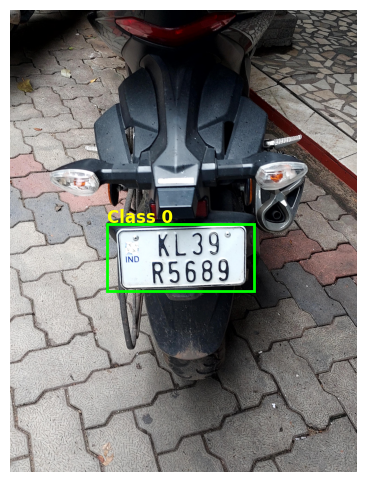

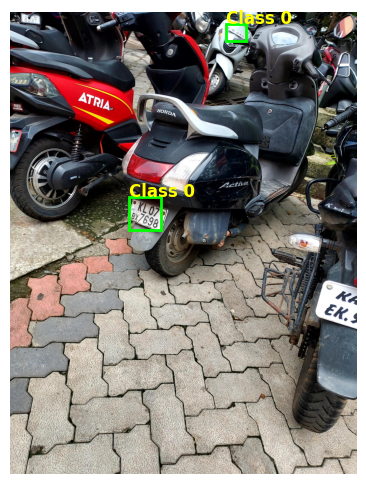

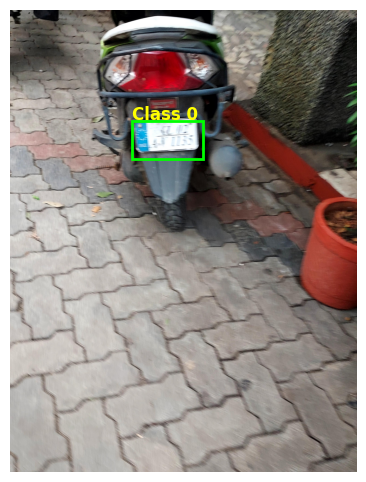

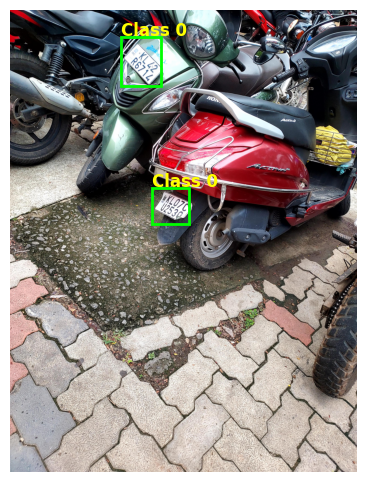

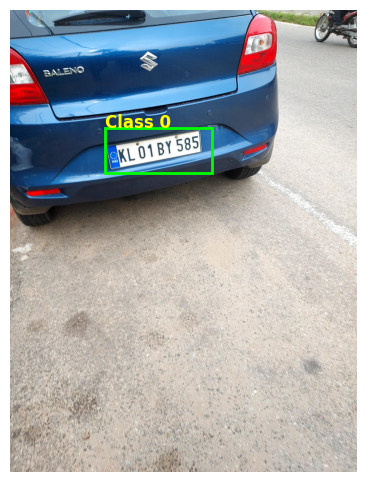

In [5]:
import matplotlib.patches as patches
LABELS_PATH="/content/drive/MyDrive/Final_project/NumberPlate Datset with annotation/yolo_labels"
image_files = glob.glob(os.path.join("/content/drive/MyDrive/Final_project/NumberPlate Datset with annotation/images/images", "*.jpg"))
labeled_images = []
for img_path in image_files:
    file_name = os.path.basename(img_path).split('.')[0]
    label_path = os.path.join(LABELS_PATH, file_name + ".txt")
    if os.path.exists(label_path):
        labeled_images.append((img_path, label_path))

print(f"Found {len(labeled_images)} images with matching labels.")

sample_pairs = random.sample(labeled_images, min(5, len(labeled_images)))


for img_path, label_path in sample_pairs:
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    h, w, _ = img.shape

    with open(label_path, "r") as f:
        lines = f.readlines()

    fig, ax = plt.subplots(1, figsize=(8, 6))
    ax.imshow(img)

    for line in lines:
        cls, x_center, y_center, bw, bh = map(float, line.strip().split())


        x_center, y_center, bw, bh = x_center * w, y_center * h, bw * w, bh * h
        x1, y1 = int(x_center - bw / 2), int(y_center - bh / 2)

        rect = patches.Rectangle((x1, y1), bw, bh, linewidth=2, edgecolor='lime', facecolor='none')
        ax.add_patch(rect)
        ax.text(x1, y1-5, f"Class {int(cls)}", color="yellow", fontsize=12, weight="bold")

    plt.axis("off")
    plt.show()


In [ ]:
import os, glob
IMAGES_PATH = "/content/drive/MyDrive/Final_project/NumberPlate Datset with annotation/images/images"
LABELS_PATH = "/content/drive/MyDrive/Final_project/NumberPlate Datset with annotation/yolo_labels"
all_images = [os.path.basename(f).split('.')[0] for f in glob.glob(os.path.join(IMAGES_PATH, "*.jpg"))]
all_labels = [os.path.basename(f).split('.')[0] for f in glob.glob(os.path.join(LABELS_PATH, "*.txt"))]
print(f"📸 Total images: {len(all_images)}")
print(f"🏷️ Total labels: {len(all_labels)}")


#THE DATA SET ONLY HAS 116 LABELED IMAGES OUT OF 410 IMAGES , IN THIS KIND OF SITUATION'S  WE CAN USE MANUAL BOUNDING OR AUTOMATIC BOUNDING BOX USING ROBOFLOW TO INCREASE THE SIZE OF THE DATASET,
#FOR THIS PROJECT I AM GOING TO ONLY USE THE LABELED IMAGES IN THE DATASET.

📸 Total images: 410
🏷️ Total labels: 116


## Visualizing how number plates positions are distributed accross the data set based on the bounding box


--- Bounding Box Distribution ---


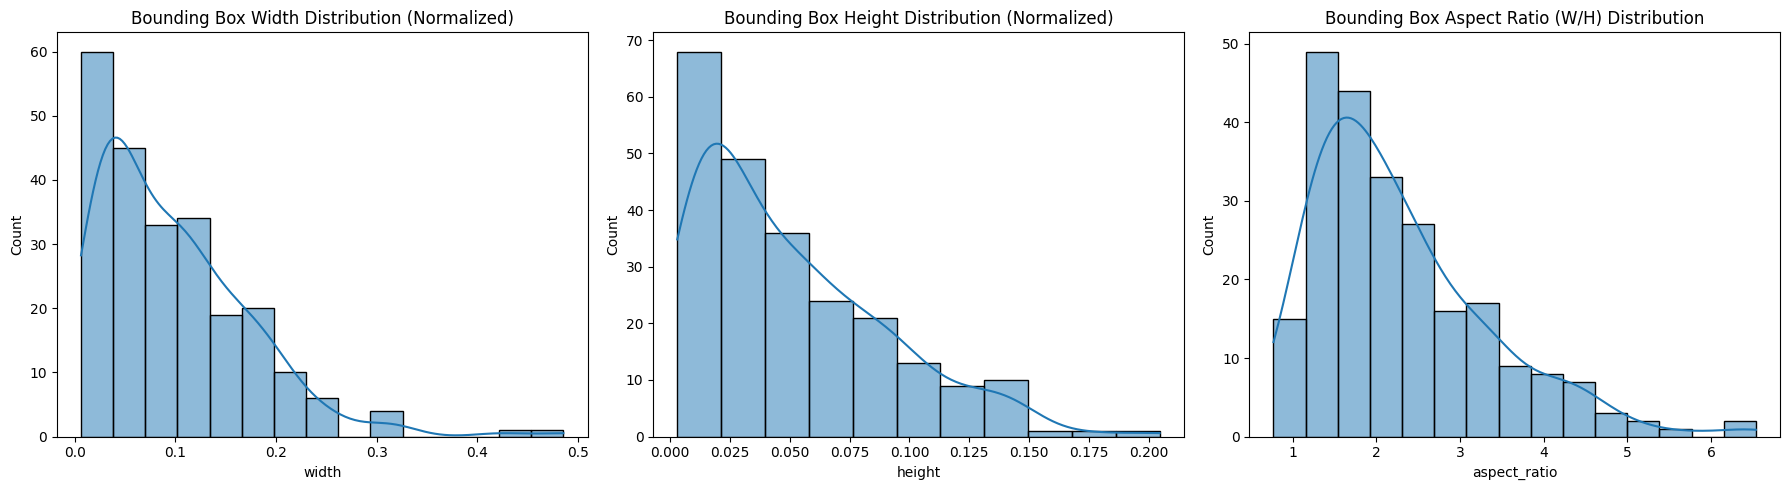


Bounding Box Statistics:
            width      height  aspect_ratio
count  233.000000  233.000000    233.000000
mean     0.098023    0.049939      2.287232
std      0.076048    0.039940      1.056498
min      0.006333    0.003000      0.772815
25%      0.036000    0.017000      1.507235
50%      0.082667    0.039250      2.044700
75%      0.139000    0.074000      2.772867
max      0.485333    0.204500      6.533400


In [6]:
import pandas as pd
print("\n--- Bounding Box Distribution ---")
LABEL_PATH = '/content/drive/MyDrive/Final_project/NumberPlate Datset with annotation/yolo_labels'

if os.path.exists(LABEL_PATH):
    bbox_data = []
    label_files = [f for f in os.listdir(LABEL_PATH) if f.endswith('.txt')]

    for lf in label_files:
        with open(os.path.join(LABEL_PATH, lf), 'r') as f:
            for line in f.readlines():
                parts = line.split()
                if len(parts) == 5:
                    w = float(parts[3])
                    h = float(parts[4])
                    bbox_data.append({'width': w, 'height': h, 'aspect_ratio': w/h if h > 0 else 0})

    if bbox_data:
        df_bbox = pd.DataFrame(bbox_data)

        plt.figure(figsize=(18, 5))

        plt.subplot(1, 3, 1)
        sns.histplot(df_bbox['width'], kde=True)
        plt.title('Bounding Box Width Distribution (Normalized)')

        plt.subplot(1, 3, 2)
        sns.histplot(df_bbox['height'], kde=True)
        plt.title('Bounding Box Height Distribution (Normalized)')

        plt.subplot(1, 3, 3)
        sns.histplot(df_bbox['aspect_ratio'], kde=True)
        plt.title('Bounding Box Aspect Ratio (W/H) Distribution')

        plt.tight_layout()
        plt.show()

        print("\nBounding Box Statistics:")
        print(df_bbox.describe())
    else:
        print("No valid bounding box data found.")
else:
    print(f"Label path not found at {LABEL_PATH}. Skipping bounding box analysis.")

SPLITTING THE DATASET INTO TEST AND TRAIN SET FOR MODEL TRAIN



In [7]:
import os, glob, random, shutil


IMAGES = "/content/drive/MyDrive/Final_project/NumberPlate Datset with annotation/images/images"
LABELS = "/content/drive/MyDrive/Final_project/NumberPlate Datset with annotation/yolo_labels"

all_images = [os.path.splitext(os.path.basename(p))[0] for p in glob.glob(IMAGES + "/*.jpg")]
labeled = [name for name in all_images if os.path.exists(os.path.join(LABELS, name + ".txt"))]

print(f"📸 Total images: {len(all_images)}")
print(f"🏷️ Labeled images: {len(labeled)}")


random.seed(42)
random.shuffle(labeled)
n = len(labeled)
train = labeled[:int(0.9*n)]
test  = labeled[int(0.9*n):]

base =  "/content/drive/MyDrive/Final_project/dataset"
for folder in ["train/images","test/images","train/labels","test/labels"]:
    os.makedirs(os.path.join(base, folder), exist_ok=True)


def copy_files(names, split):
    for name in names:
        shutil.copy(os.path.join(IMAGES, name + ".jpg"), os.path.join(base, split, "images"))
        shutil.copy(os.path.join(LABELS, name + ".txt"), os.path.join(base, split, "labels"))

copy_files(train, "train")
copy_files(test, "test")

print("Dataset split complete!")
print(f"Train: {len(train)}, test: {len(test)}")


📸 Total images: 410
🏷️ Labeled images: 115
Dataset split complete!
Train: 103, test: 12


In [8]:
import os
import glob
import shutil

IMAGES_PATH = "/content/drive/MyDrive/Final_project/NumberPlate Datset with annotation/images/images"
LABELS_PATH = "/content/drive/MyDrive/Final_project/NumberPlate Datset with annotation/yolo_labels"

all_image_basenames = [os.path.splitext(os.path.basename(p))[0] for p in glob.glob(IMAGES_PATH + "/*.jpg")]

labeled_image_basenames = [os.path.splitext(os.path.basename(p))[0] for p in glob.glob(LABELS_PATH + "/*.txt")]

unlabeled_image_basenames = [name for name in all_image_basenames if name not in labeled_image_basenames]

unlabeled_dir = os.path.join("/content/drive/MyDrive/Final_project", "unlabeled_images")
os.makedirs(unlabeled_dir, exist_ok=True)

print(f"Found {len(unlabeled_image_basenames)} unlabeled images.")
print(f"Copying unlabeled images to: {unlabeled_dir}")
for img_name in unlabeled_image_basenames:
    src_path = os.path.join(IMAGES_PATH, img_name + ".jpg")
    dst_path = os.path.join(unlabeled_dir, img_name + ".jpg")
    if os.path.exists(src_path):
        shutil.copy(src_path, dst_path)

print("Copying complete.")
print(f"You can find the unlabeled images in: {unlabeled_dir}")

Found 295 unlabeled images.
Copying unlabeled images to: /content/drive/MyDrive/Final_project/unlabeled_images
Copying complete.
You can find the unlabeled images in: /content/drive/MyDrive/Final_project/unlabeled_images


## CREATING DATA.YAML FILE FOR THE MODEL

THE PURPOSE OF YAML FILE IS VERY SIMPLE.

IT'S LIKE A INSTRUCTION TO THE YOLO MODEL TO FIND THE TRAINING AND TEST DATASET/IMAGES.

NUMBER CLASSES OR NC SHOWS HOW MANY ITEMS IT'S GOING TO DETECT.
IN OUR CASE  IT'S ONLY NUMBER PLATE OF THE VECHILES.



In [9]:
%%writefile /content/drive/MyDrive/Final_project/dataset/data.yaml
path: /content/drive/MyDrive/Final_project/dataset
train: train/images
val: test/images
nc: 1
names: ['Number Plate']

Overwriting /content/drive/MyDrive/Final_project/dataset/data.yaml


Installing YOLO v8

In [10]:
import ultralytics #ULTRALYTICS IS VERY IMPORATANT PACKAGE FOR USING YOLO MODELS BECAUSE WITHOUT ULTRALYTICS WE CAN'T USE ANY YOLO MODEL'S
ultralytics.checks()

Ultralytics 8.3.229 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.0/112.6 GB disk)


## FOR TRAINNING I HAVE DECIDED TO GO WITH MINIMALISTIC APPROCH BECAUSE IN MY TEST RUNS USNING DIFFERENT COMBINATION OF HYPERPARAMETERS ONLY MADE THE MODEL WORSE IN PRECISION SCORE.


In [ ]:
from ultralytics import YOLO
model = YOLO("yolov8s.pt")

model.train(
    data="/content/drive/MyDrive/Final_project/dataset/data.yaml",
    epochs=50,
    imgsz=920,
    batch=16,
    lr0=0.001,
    name="plate_detector",
    degrees=15.0,
    shear=1.0,
    perspective=0.0005


)


In [ ]:
results=model.predict(source="/content/drive/MyDrive/Final_project/dataset/test/images",conf=0.21)

for result in results:
   result.show()

## Model's accuracy on test set

In [15]:
from ultralytics import YOLO

model_path = "/content/runs/detect/plate_detector2/weights/best.pt"
model = YOLO(model_path)

metrics = model.val(data="/content/drive/MyDrive/Final_project/dataset/data.yaml")

print("Model Validation Metrics:")
print(f"Precision (P): {metrics.box.p[0]:.4f}")
print(f"Recall (R): {metrics.box.r[0]:.4f}")
print(f"mAP50: {metrics.box.map50:.4f}")
print(f"mAP50-95: {metrics.box.map:.4f}")

Ultralytics 8.3.229 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 0.8±0.8 ms, read: 199.6±61.9 MB/s, size: 1321.1 KB)
val: Scanning /content/drive/MyDrive/Final_project/dataset/test/labels.cache... 12 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 12/12 2.9Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 3.2s/it 3.2s
                   all         12         23       0.71      0.826       0.87      0.465
Speed: 2.5ms preprocess, 18.5ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to /content/runs/detect/val
Model Validation Metrics:
Precision (P): 0.7101
Recall (R): 0.8261
mAP50: 0.8700
mAP50-95: 0.4650


NOW WE ARE MOVING TO THE DETECTION OF THE NUMBER PLATES BY THE TRAINED MODEL WITH 40% CONFIDENCE

## EASYOCR

In [ ]:
import os
import cv2
import shutil
import matplotlib.pyplot as plt

crops_dir = "/content/plate_crops_for_ocr"
if os.path.exists(crops_dir):
    shutil.rmtree(crops_dir)
os.makedirs(crops_dir, exist_ok=True)

results = model.predict(source="/content/drive/MyDrive/Final_project/dataset/test/images", conf=0.214, save=False, verbose=False)

plate_crops = []

for result in results:
    img = result.orig_img

    annotated_img = img.copy()

    for i, det in enumerate(result.boxes.xyxy):
        x1, y1, x2, y2 = map(int, det)
        cropped_plate = img[y1:y2, x1:x2]


        base_filename = os.path.basename(result.path).split('.')[0]
        crop_filename = f"{base_filename}_crop_{i}.jpg"
        crop_path = os.path.join(crops_dir, crop_filename)
        cv2.imwrite(crop_path, cropped_plate)
        plate_crops.append(crop_path)

        cv2.rectangle(annotated_img, (x1, y1), (x2, y2), (0, 255, 0), 2)

    plt.figure(figsize=(10, 8))
    plt.imshow(cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB))
    plt.title(f"Detected Plate(s) in {os.path.basename(result.path)}")
    plt.axis('off')
    plt.show()

print(f"Total {len(plate_crops)} plate crops extracted and saved to {crops_dir}")


In [17]:
import cv2
import numpy as np

def preprocess_plate(image_path):
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Image not found at {image_path}")
        return None
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    clahe_img = clahe.apply(gray)

    median_blur_img = cv2.medianBlur(clahe_img, 5)

    binary_img = cv2.adaptiveThreshold(median_blur_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                       cv2.THRESH_BINARY, 11, 2)

    return binary_img

print("Defined preprocess_plate function.")

Defined preprocess_plate function.


In [ ]:
import easyocr
import matplotlib.pyplot as plt

reader = easyocr.Reader(['en'])

for crop_path in plate_crops:
    preprocessed_img = preprocess_plate(crop_path)
    result = reader.readtext(preprocessed_img)

    print(f"📸 {crop_path}")
    plt.figure(figsize=(6, 3))
    plt.imshow(preprocessed_img, cmap='gray')
    plt.title(f"Preprocessed Plate: {os.path.basename(crop_path)}")
    plt.axis("off")
    plt.show()

    if result:
        for (bbox, text, conf) in result:
            print(f"🔎 Text: {text} (Confidence: {conf:.2f})")
    else:
        print("🔎 No text detected.")
    print("-"*50)

In [27]:
%%writefile app.py
import streamlit as st
import cv2
import numpy as np
from ultralytics import YOLO
import easyocr
import time
import tempfile
import os
import base64
import pandas as pd

st.set_page_config(page_title="Automatic Number Plate Recognition", page_icon="🚗", layout="wide")

def set_background_image(image_path):
    try:
        with open(image_path, "rb") as f:
            img_bytes = f.read()
        encoded_img = base64.b64encode(img_bytes).decode()
        css = f"""
        <style>
        .stApp {{
            background-image: url("data:image/jpeg;base64,{encoded_img}");
            background-size: cover;
            background-position: center;
            background-repeat: no-repeat;
            background-attachment: fixed;
        }}
        </style>
        """
        st.markdown(css, unsafe_allow_html=True)
    except FileNotFoundError:
        st.warning(f"Background image not found at {image_path}. Using default background.")
        pass

background_image_path = "/content/drive/MyDrive/pexels-instawally-176851.jpg"
set_background_image(background_image_path)

tab1, tab2, tab3 = st.tabs(["ANPR System using YOLOV8", "Webcam", "About Project"])


@st.cache_resource
def load_model():
    try:
        model_path = "/content/runs/detect/plate_detector2/weights/best.pt"
        return YOLO(model_path)
    except Exception as e:
        st.error(f"Model load failed: {e}")
        return None

@st.cache_resource
def load_ocr():
    try:
        return easyocr.Reader(['en'])
    except Exception as e:
        st.error(f"OCR init failed: {e}")
        return None

# preprocessing function
def preprocess_for_easyocr_array(image_array):

    gray = cv2.cvtColor(image_array, cv2.COLOR_BGR2GRAY)

    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    clahe_img = clahe.apply(gray)
    median_blur_img = cv2.medianBlur(clahe_img, 5)

    binary_img = cv2.adaptiveThreshold(median_blur_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                       cv2.THRESH_BINARY, 11, 2)
    return binary_img

model = load_model()
reader = load_ocr()

def process_anpr(img, conf_threshold):
    start = time.time()
    if isinstance(img, np.ndarray):
        with tempfile.NamedTemporaryFile(suffix=".jpg", delete=False) as temp_img:
            cv2.imwrite(temp_img.name, img)
            source = temp_img.name
    else:
        source = img

    results = model.predict(source=source, conf=conf_threshold, save=False, verbose=False)

    if isinstance(img, np.ndarray) and os.path.exists(source):
        os.unlink(source)

    end = time.time()

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    annotated = img_rgb.copy()
    texts = []
    log_data = []
    detection_confidence_scores = []
    ocr_confidence_scores = []


    for result in results:
        boxes = result.boxes.xyxy.cpu().numpy()
        confs = result.boxes.conf.cpu().numpy()
        detection_confidence_scores.extend(confs)

        for i, box in enumerate(boxes):
            x1, y1, x2, y2 = map(int, [box[0], box[1], box[2], box[3]])
            detection_conf = confs[i]
            cv2.rectangle(annotated, (x1, y1), (x2, y2), (255, 255, 0), 2)
            crop = img_rgb[y1:y2, x1:x2]

            preprocessed_crop = preprocess_for_easyocr_array(crop)

            ocr = reader.readtext(preprocessed_crop)

            if ocr:
                text = " ".join([t[1] for t in ocr])
                texts.append(text)
                cv2.putText(annotated, text, (x1, y1 - 10),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0,255,0), 2)
                for (_, ocr_text, conf) in ocr:
                    ocr_confidence_scores.append(conf)

                image_name = os.path.basename(result.path) if result.path else "Webcam Capture"

                log_data.append({"Image": image_name, "Plate Text": text, "Detection Confidence": detection_conf, "OCR Confidence": np.mean([c[2] for c in ocr]) if ocr else 0}) # Average OCR confidence for the plate


    avg_detection_confidence = np.mean(detection_confidence_scores) if detection_confidence_scores else 0
    avg_ocr_confidence = np.mean(ocr_confidence_scores) if ocr_confidence_scores else 0

    return annotated, texts, end - start, log_data, avg_detection_confidence, avg_ocr_confidence


with tab1:
    st.title("Automatic Number Plate Recognition (ANPR)")
    st.write("""
    Upload a vehicle image to detect and extract the license plate text
    using **YOLOv8** for detection and **EasyOCR** for text recognition.
    """)
    conf_threshold = st.slider("🎯 Detection Confidence", 0.2, 0.9, 0.4, help="Adjust the confidence threshold for object detection.")

    uploaded = st.file_uploader("📂 Upload Vehicle Image", type=["jpg","jpeg","png"])
    if uploaded and model and reader:
        tfile = tempfile.NamedTemporaryFile(delete=False)
        tfile.write(uploaded.read())
        img = cv2.imread(tfile.name)

        with st.spinner("🔍 Detecting license plate..."):
            annotated_img, texts, duration, log_data, avg_detection_confidence, avg_ocr_confidence = process_anpr(img, conf_threshold)

        st.image(annotated_img, caption="Detection Result", use_column_width=True)
        if texts:
            st.success(f"✅ Detected Plates: {', '.join(texts)}")
            df_log = pd.DataFrame(log_data)

            st.subheader("📊 Performance Metrics")
            col1, col2, col3 = st.columns(3)
            col1.metric("⚡ Processing Time", f"{duration:.2f}s")
            col2.metric("🎯 Avg. Detection Confidence", f"{avg_detection_confidence:.2f}")
            col3.metric("🔎 Avg. OCR Confidence", f"{avg_ocr_confidence:.2f}")

            st.subheader("📝 Detection Log")
            st.dataframe(df_log)

            csv_log = df_log.to_csv(index=False).encode('utf-8')
            st.download_button(
                label="Download Detection Log",
                data=csv_log,
                file_name="detection_log.csv",
                mime="text/csv"
            )

        else:
            st.warning("❌ No plate text detected.")
        st.caption(f"⚡ Total Inference Time: {duration:.2f}s")

with tab2:
    st.title("📷 Webcam ANPR")
    st.write("Use your webcam to capture an image and detect license plates.")
    st.warning("Note: Real-time streaming is not supported in this environment due to dependency issues. You can capture a single frame.")

    conf_threshold = st.slider("🎯 Detection Confidence (Webcam)", 0.2, 0.9, 0.4, help="Adjust the confidence threshold for object detection for webcam capture.")

    captured_image = st.camera_input("📸 Capture Image")

    if captured_image is not None and model and reader:
        file_bytes = np.asarray(bytearray(captured_image.read()), dtype=np.uint8)
        img = cv2.imdecode(file_bytes, cv2.IMREAD_COLOR)

        with st.spinner("🔍 Detecting license plate..."):
            annotated_img, texts, duration, log_data, avg_detection_confidence, avg_ocr_confidence = process_anpr(img, conf_threshold)

        st.image(annotated_img, caption="Detection Result", use_column_width=True)
        if texts:
            st.success(f"✅ Detected Plates: {', '.join(texts)}")
            df_log = pd.DataFrame(log_data)

            st.subheader("📊 Performance Metrics")
            col1, col2, col3 = st.columns(3)
            col1.metric("⚡ Processing Time", f"{duration:.2f}s")
            col2.metric("🎯 Avg. Detection Confidence", f"{avg_detection_confidence:.2f}")
            col3.metric("🔎 Avg. OCR Confidence", f"{avg_ocr_confidence:.2f}")

            st.subheader("📝 Detection Log")
            st.dataframe(df_log)

            csv_log = df_log.to_csv(index=False).encode('utf-8')
            st.download_button(
                label="Download Detection Log",
                data=csv_log,
                file_name="detection_log.csv",
                mime="text/csv"
            )
        else:
            st.warning("❌ No plate text detected.")
        st.caption(f"⚡ Total Inference Time: {duration:.2f}s")

with tab3:
    st.title("ℹ️ About This Project")
    st.markdown("""
    ## 🚗 Automatic Number Plate Recognition (ANPR)
    This web application automatically detects and reads vehicle license plates
    using **Deep Learning(_YOLO_)** and **Optical Character Recognition (OCR)**.

    ### 🧩 Technologies Used
    - **YOLOv8**: For license plate detection
    - **EasyOCR**: For reading alphanumeric characters
    - **OpenCV & NumPy**: For image processing
    - **Streamlit**: For creating the user interface

    ### ⚙️ Workflow
    1. Upload a vehicle image or use webcam (captures a single photo)
    2. The trained YOLOv8 model detects the plate region
    3. EasyOCR extracts and reads the text from the detected plate
    4. The output image and text are displayed instantly

    ### 👨‍💻 Creator
    **Name:** Karthik muruganathem
    **Role:** Data scientist
    **Contact:** [📧 Email me](mailto:karthikrx100tamil@gmail.com)
    **GitHub:** [github.com/Karmukilkar](https://github.com/Karmukilkar)

    ### 💡 Future Improvements
    - Real-time webcam detection (Requires resolving dependency issues or alternative approaches)
    - Multi-plate recognition for parking systems
    - Integration with a vehicle database for instant info retrieval

    ---
    _Built with ❤️ using Streamlit and Python._
    """)

Overwriting app.py


USEING NGROK : MY FIRST CHOICE WAS TO HOST THE WEB APPLICATION THROUGH LOCAL TUNNEL BUT IT WAS VERY SLOW AND NEVER DISPLAYED THE WEB APPLICATION , SO I HAVE DECIDED TO HOST MY WEB APPLICATION THROUGH NGROK WHICH IS FASTER THEN LOCAL TUNNEL .

In [20]:
!pip install pyngrok --quiet

In [21]:
!ls

app.py	drive  plate_crops_for_ocr  runs  yolo11n.pt  yolov8s.pt


In [22]:
!streamlit run app.py &>/content/logs.txt &

In [26]:
from pyngrok import ngrok
import os
import time
from google.colab import userdata

try:
  NGROK_AUTH_TOKEN = userdata.get('NGROK_AUTH_TOKEN')
except:
  print("NGROK_AUTH_TOKEN not found in Colab secrets.")
  print("Please add your ngrok authtoken to Colab secrets and try again.")
  NGROK_AUTH_TOKEN = "34lYug9PUgnpVD8NMPt7JaMQsGR_ECJjXuQmcXvLz5UmQwne"#"33F1f3bk62jPBgh0KcDnt4299WgC_3fDXFhD98BfR3QGGcax4T"

if NGROK_AUTH_TOKEN:
  ngrok.set_auth_token(NGROK_AUTH_TOKEN)
  print("Waiting for Streamlit to start...")
  time.sleep(5)


  try:
      public_url = ngrok.connect(addr="8501", proto="http")
      print(f"Streamlit app available at: {public_url}")
  except Exception as e:
      print(f"Error starting ngrok tunnel: {e}")
else:
  print("Cannot start ngrok tunnel without NGROK_AUTH_TOKEN.")

NGROK_AUTH_TOKEN not found in Colab secrets.
Please add your ngrok authtoken to Colab secrets and try again.
Waiting for Streamlit to start...
Streamlit app available at: NgrokTunnel: "https://growable-psychiatrically-justus.ngrok-free.dev" -> "http://localhost:8501"


In [34]:
ngrok.kill()
print("ngrok tunnel closed.")

ngrok tunnel closed.


In [ ]:
#!rm -r /content/runs/detect/plate_detector_preprocessed

In [28]:
import random

num_to_select = min(random.randint(20, 30), len(unlabeled_image_basenames))

unlabeled_test_images_basenames = random.sample(unlabeled_image_basenames, num_to_select)

print(f"Selected {len(unlabeled_test_images_basenames)} unlabeled images for the new test set:")
print(unlabeled_test_images_basenames[:5])

Selected 24 unlabeled images for the new test set:
['20230619_182729ll', '20230518_092348', '20230626_091708', '20230809_124942', '20230620_161309']


In [29]:
import os

UNLABELED_TEST_SET_PATH = "/content/drive/MyDrive/Final_project/unlabeled_test_set"
os.makedirs(UNLABELED_TEST_SET_PATH, exist_ok=True)

print(f"Created directory for the new unlabeled test set: {UNLABELED_TEST_SET_PATH}")

Created directory for the new unlabeled test set: /content/drive/MyDrive/Final_project/unlabeled_test_set


In [30]:
import shutil

images_copied_count = 0
for basename in unlabeled_test_images_basenames:
    src_image_path = os.path.join(unlabeled_dir, basename + ".jpg")
    dst_image_path = os.path.join(UNLABELED_TEST_SET_PATH, basename + ".jpg")

    if os.path.exists(src_image_path):
        shutil.copy(src_image_path, dst_image_path)
        images_copied_count += 1
    else:
        print(f"Warning: Source image not found for {basename}. Skipping.")

print(f"Successfully copied {images_copied_count} unlabeled images to {UNLABELED_TEST_SET_PATH}")

Successfully copied 24 unlabeled images to /content/drive/MyDrive/Final_project/unlabeled_test_set


In [32]:
from ultralytics import YOLO
import os
model_path = "/content/runs/detect/plate_detector2/weights/best.pt"
model = YOLO(model_path)

source_directory = UNLABELED_TEST_SET_PATH

unlabeled_test_results = model.predict(source=source_directory, conf=0.21, save=False, verbose=False)

print(f"Performed object detection on images in: {source_directory}")

Performed object detection on images in: /content/drive/MyDrive/Final_project/unlabeled_test_set


In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

total_images_processed = 0
total_plates_detected = 0
all_detection_confidences = []

print("Displaying detections on unlabeled test images:")

for result in unlabeled_test_results:
    total_images_processed += 1
    img = result.orig_img

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    annotated_img = img_rgb.copy()

    detected_in_image = 0
    if result.boxes:
        for box in result.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            conf = float(box.conf[0])

            cv2.rectangle(annotated_img, (x1, y1), (x2, y2), (0, 255, 0), 2)

            label = f"Plate: {conf:.2f}"
            cv2.putText(annotated_img, label, (x1, y1 - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

            detected_in_image += 1
            all_detection_confidences.append(conf)

    total_plates_detected += detected_in_image

    plt.figure(figsize=(10, 8))
    plt.imshow(annotated_img)
    plt.title(f"Detected Plates in {os.path.basename(result.path)} ({detected_in_image} plates)")
    plt.axis('off')
    plt.show()

print("\n--- Model Performance Summary on Unlabeled Test Set ---")
print(f"Total Images Processed: {total_images_processed}")
print(f"Total Plates Detected: {total_plates_detected}")

if all_detection_confidences:
    average_confidence = np.mean(all_detection_confidences)
    print(f"Average Detection Confidence: {average_confidence:.2f}")
else:
    print("No plates were detected in the test set.")